# 타이타닉 생존자 분석 프로젝트
해당자료는 석은 Kaggle Titanic 데이터를 기반하여으로 생존률을 다양한 관점에서 분석한 결과입니.


## 목차

1. 데이터 불러오기
2. 데이터 기본 정보 살펴보기
3. 생존자 비율 분석
4. 성별에 따른 생존률
5. 나이대별 생존률
6. 분석 리 및 결론


## 1. 데이터 불러오기

In [7]:
# 데이터 파일 불러오기
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.데이터 구조 확인

In [11]:
# 데이터 구조 확인
df.info()

# 데이터 통계 요약
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. 전체 생존률 분석

In [14]:
# 전체 생존률 비율 확인
df['Survived'].value_counts(normalize=True)

# 0은 사망 비율
# 1은 생존 비율

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

## 4. 성별 생존률 시각화

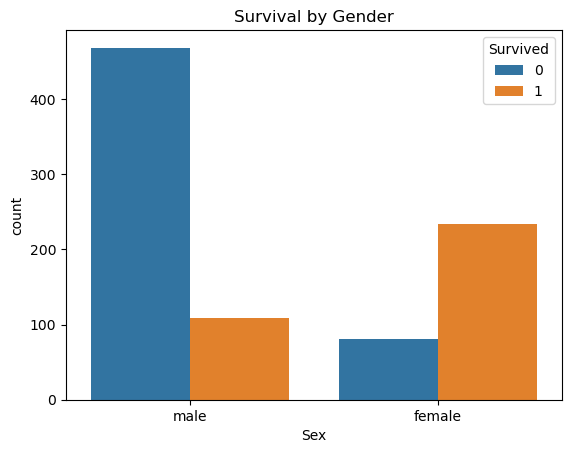

In [21]:
# 생존자 수 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

## 5. 나이대별 생존률 시각화


In [23]:
# 1. 나이 구간(bins) 만들기
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# 2. 구간 이름(labels) 만들기
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

print(df[['Age','AgeGroup']])

      Age AgeGroup
0    22.0    20-30
1    38.0    30-40
2    26.0    20-30
3    35.0    30-40
4    35.0    30-40
..    ...      ...
886  27.0    20-30
887  19.0    10-20
888   NaN      NaN
889  26.0    20-30
890  32.0    30-40

[891 rows x 2 columns]


In [24]:
print(df['Survived'].dtype)

object


In [25]:
df['Survived'] = df['Survived'].astype(int)

In [26]:
agegroup_survival = df.groupby('AgeGroup',observed=False)['Survived'].mean()
print(agegroup_survival)

AgeGroup
0-10     0.593750
10-20    0.382609
20-30    0.365217
30-40    0.445161
40-50    0.383721
50-60    0.404762
60-70    0.235294
70-80    0.200000
Name: Survived, dtype: float64


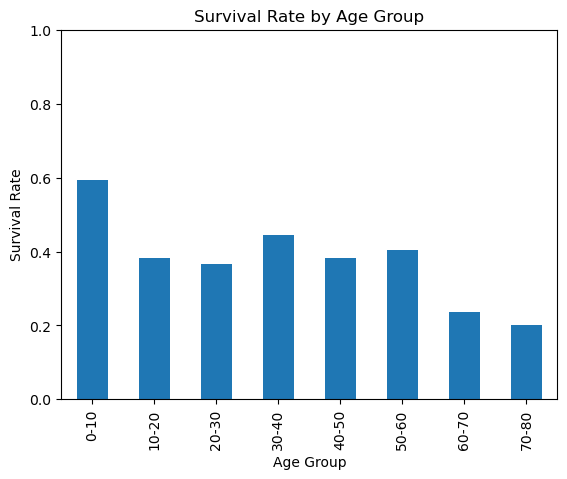

In [27]:
agegroup_survival.plot(kind='bar')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0,1)
plt.show()

## 6. 결론

## 성별 생존률 분석 결론

- 남성 승객은 사망자가 압도적으로 많았으며, 생존자는 매우 적었다.
- 여성 승객은 사망자보다 생존자가 더 많아, 구조 우선순위가 높았던 것으로 보인다.

=> 타이타닉 사고 당시 여성 승객이 남성보다 생존할 확률이 매우 높았다.





## 나이별 생존률 분석 결론

- 0-10세 어린이 승객의 생존률이 다른 연령대에 비해 가장 높았다.
- 10-30세 승객(특히 20대)의 생존률은 상대적으로 낮았다.
- 30-60세 승객은 20대보다 생존률이 높아졌다.
- 60세 이상(60-80)의 고령 승객은 생존률이 크게 낮아졌다.

이 분석을 통해 나이가 승객 생존률에 중요한 영향을 미쳤으며,  
특히 어린이 승객이 구조 우선순위가 높았음을  수 있었다.
